In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the spreadsheet link to an API link
spreadsheet_id = '1vRJF9p71J7dNvjKD1Th01P42OgCE4h-QnjilpJNy25g'
api_link = f'https://docs.google.com/spreadsheets/d/{spreadsheet_id}/gviz/tq?tqx=out:csv&sheet=Sheet1'

# Read the data from the API link using pandas
df = pd.read_csv(api_link)

# Select relevant columns for analysis
selected_columns = ['Advertisement_Type', 'Newspaper_Investment', 'Facebook_Investment', 'Instagram_Investment',
                    'YouTube_Investment', 'Twitter_Investment', 'LinkedIn_Investment',
                    'Pinterest_Investment', 'Reddit_Investment', 'Snapchat_Investment',
                    'Sales_Revenue', 'Target_Audience', 'Target_Age_Group', 'Profit']
df_selected = df[selected_columns]

# Rename columns (except the last three)
df_selected = df_selected.rename(columns={col: col.split('_')[0] for col in df_selected.columns[:-3]})

with pd.option_context('display.max_columns', None, 'display.precision', 2):
    # Print the selected DataFrame with nicer formatting
    print(df_selected.to_string(index=False))


Advertisement  Newspaper  Facebook  Instagram  YouTube  Twitter  LinkedIn  Pinterest  Reddit  Snapchat    Sales Target_Audience Target_Age_Group  Profit
      Graphic       2095    4772.0     4092.0   2638.0     3169      1466       2238    1330      2482  48559.0           Women              45+    6177
    Pinterest       2685    4380.0     1769.0   3391.0     2515      4485       3853    3433      2215  36309.0             Men            36-45  -12771
    Pinterest       3300    1747.0     3904.0      NaN     1474      2082       3558    4753      3047  31919.0             Men            36-45   -8866
     Snapchat       3734       NaN     1562.0   2899.0     4638      2267       3879    2528      4202  14931.0           Women            26-35  -29056
       Reddit       2297    3435.0     1600.0   3363.0     3061      1241       3041    3824      4417  42970.0             Men            18-25    1263
     Snapchat       2478    4499.0     3556.0   1775.0     1034      3253       41

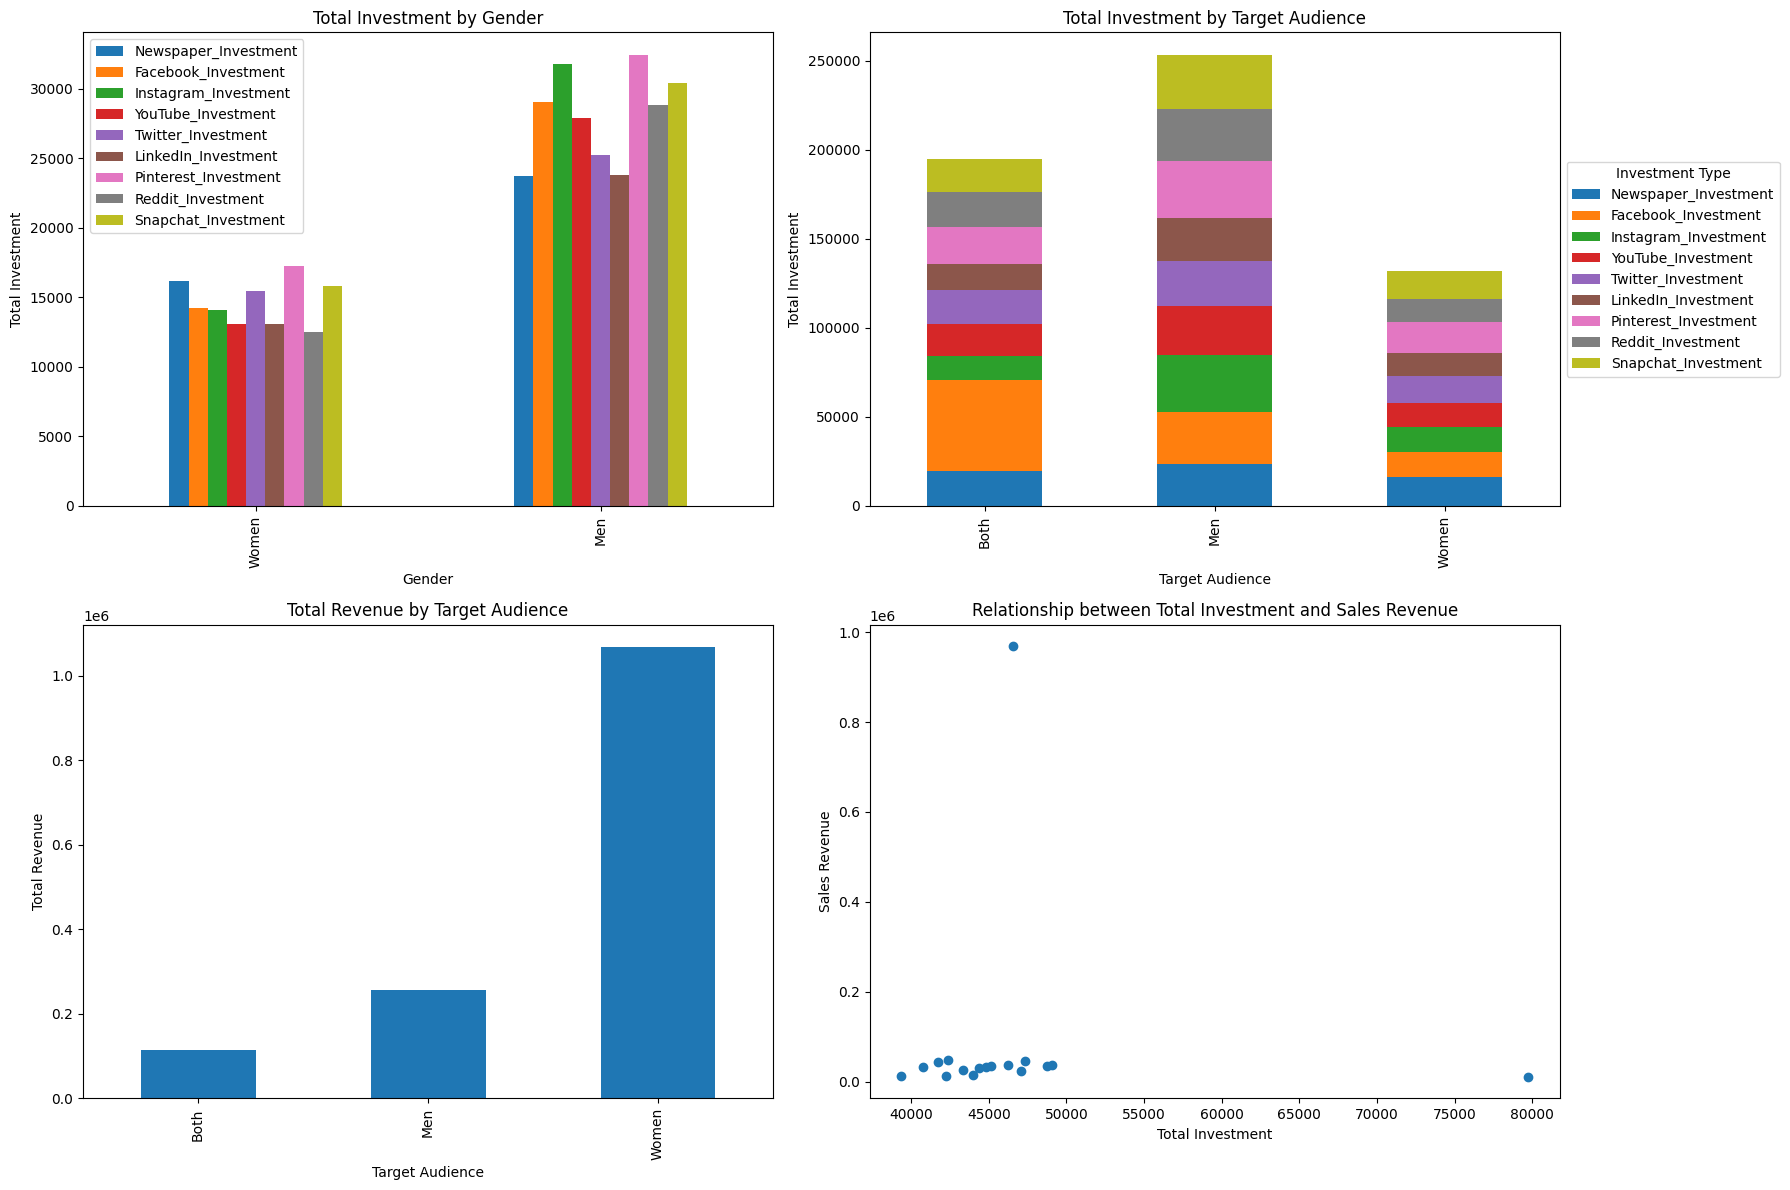

<Figure size 1200x800 with 0 Axes>

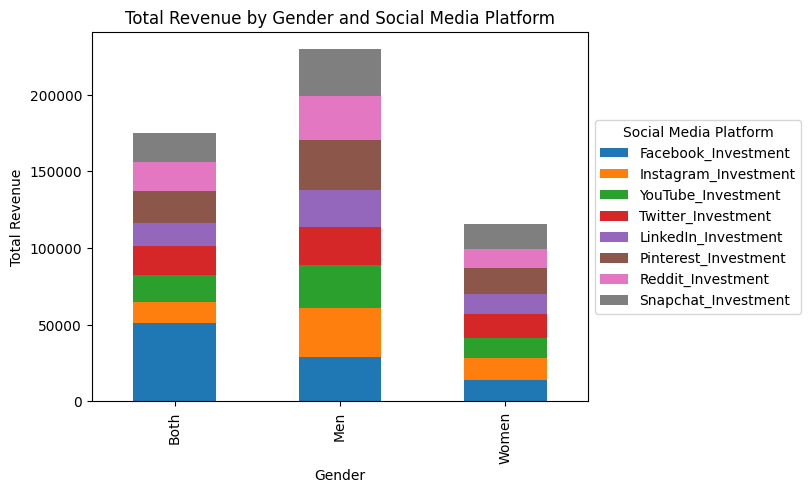

In [ ]:
# Analyze the data
# Calculate total investment and revenue by target audience
total_investment_by_audience = df.groupby('Target_Audience')[['Newspaper_Investment', 'Facebook_Investment', 'Instagram_Investment',
                                                              'YouTube_Investment', 'Twitter_Investment', 'LinkedIn_Investment',
                                                              'Pinterest_Investment', 'Reddit_Investment', 'Snapchat_Investment']].sum()
total_revenue_by_audience = df.groupby('Target_Audience')['Sales_Revenue'].sum()

# Calculate total investment by gender
total_investment_by_gender = df.groupby('Target_Audience')[['Newspaper_Investment', 'Facebook_Investment', 'Instagram_Investment',
                                                             'YouTube_Investment', 'Twitter_Investment', 'LinkedIn_Investment',
                                                             'Pinterest_Investment', 'Reddit_Investment', 'Snapchat_Investment']].sum()

# Plot the data
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Total Investment by Gender
total_investment_by_gender.loc[['Women', 'Men']].plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_title('Total Investment by Gender')
axs[0, 0].set_xlabel('Gender')
axs[0, 0].set_ylabel('Total Investment')

# Total Investment by Target Audience
total_investment_by_audience.plot(kind='bar', stacked=True, ax=axs[0, 1])
axs[0, 1].set_title('Total Investment by Target Audience')
axs[0, 1].set_xlabel('Target Audience')
axs[0, 1].set_ylabel('Total Investment')
axs[0, 1].legend(title='Investment Type', loc='center left', bbox_to_anchor=(1, 0.5))

# Total Revenue by Target Audience
total_revenue_by_audience.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_title('Total Revenue by Target Audience')
axs[1, 0].set_xlabel('Target Audience')
axs[1, 0].set_ylabel('Total Revenue')

# Scatter plot of Investment vs. Revenue
axs[1, 1].scatter(df['Total_Investment'], df['Sales_Revenue'])
axs[1, 1].set_title('Relationship between Total Investment and Sales Revenue')
axs[1, 1].set_xlabel('Total Investment')
axs[1, 1].set_ylabel('Sales Revenue')

plt.tight_layout()
plt.show()

# Calculate total revenue per gender per social media platform
selected_columns = ['Facebook_Investment', 'Instagram_Investment',
                    'YouTube_Investment', 'Twitter_Investment', 'LinkedIn_Investment',
                    'Pinterest_Investment', 'Reddit_Investment', 'Snapchat_Investment',
                    'Sales_Revenue', 'Target_Audience']
df_selected = df[selected_columns]
total_revenue_by_gender_platform = df_selected.groupby(['Target_Audience']).sum()

# Plot the data
plt.figure(figsize=(12, 8))
total_revenue_by_gender_platform.drop(columns=['Sales_Revenue']).plot(kind='bar', stacked=True)
plt.title('Total Revenue by Gender and Social Media Platform')
plt.xlabel('Gender')
plt.ylabel('Total Revenue')
plt.legend(title='Social Media Platform', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
#Calculate the total revenue per gender
total_revenue_by_platform_gender = df_selected.groupby(['Target_Audience']).sum()

# Determine the platform with the highest revenue for each gender
platforms = ['Facebook_Investment', 'Instagram_Investment', 'YouTube_Investment', 'Twitter_Investment', 'LinkedIn_Investment', 'Pinterest_Investment', 'Reddit_Investment', 'Snapchat_Investment']
max_revenue_platforms = total_revenue_by_platform_gender[platforms].idxmax(axis=1)

# Create a decision tree

platform_decision_tree = pd.DataFrame(max_revenue_platforms, columns=['Recommended Investment'])

# Display the decision tree
print(platform_decision_tree)

                Recommended Investment
Target_Audience                       
Both               Facebook_Investment
Men               Pinterest_Investment
Women             Pinterest_Investment


In [ ]:
max_revenue_platforms = total_revenue_by_platform_gender[platforms].idxmax()

# Create a decision tree
gender_decision_tree = pd.DataFrame(max_revenue_platforms, index=platforms, columns=['Recommended Gender'])

# Display the decision tree
print(gender_decision_tree)

                     Recommended Gender
Facebook_Investment                Both
Instagram_Investment                Men
YouTube_Investment                  Men
Twitter_Investment                  Men
LinkedIn_Investment                 Men
Pinterest_Investment                Men
Reddit_Investment                   Men
Snapchat_Investment                 Men


In [ ]:
#Redefine df_selected adding 'Profit' column
selected_columns = ['Facebook_Investment', 'Instagram_Investment',
                    'YouTube_Investment', 'Twitter_Investment', 'LinkedIn_Investment',
                    'Pinterest_Investment', 'Reddit_Investment', 'Snapchat_Investment',
                    'Sales_Revenue', 'Target_Audience', 'Profit']
df_selected = df[selected_columns]

#Classify whether the income is a profit, loss, or break-even point
def classify_profit(Profit):
    return 'Loss' if Profit < 0 else 'Break-even' if Profit == 0 else 'Profit'

# Check if 'Profit' column exists in the DataFrame
if 'Profit' in df_selected.columns:
    # Apply the classification function to the 'Profit' column
    df_selected['Profit_Class'] = df_selected['Profit'].apply(classify_profit)

    # Display the updated DataFrame
    with pd.option_context('display.max_columns', None, 'display.precision', 2):
        print(df_selected.to_string(index=False))
else:
    print("Error: 'Profit' column not found in DataFrame.")


 Facebook_Investment  Instagram_Investment  YouTube_Investment  Twitter_Investment  LinkedIn_Investment  Pinterest_Investment  Reddit_Investment  Snapchat_Investment  Sales_Revenue Target_Audience  Profit Profit_Class
              4772.0                4092.0              2638.0                3169                 1466                  2238               1330                 2482        48559.0           Women    6177       Profit
              4380.0                1769.0              3391.0                2515                 4485                  3853               3433                 2215        36309.0             Men  -12771         Loss
              1747.0                3904.0                 NaN                1474                 2082                  3558               4753                 3047        31919.0             Men   -8866         Loss
                 NaN                1562.0              2899.0                4638                 2267                  3879   

<ipython-input-18-585bbb878953>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Profit_Class'] = df_selected['Profit'].apply(classify_profit)
